<a href="https://colab.research.google.com/github/jecsakf/deep_learning/blob/main/Masodik_hazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. házi feladat

A második házi feladat során egy egyszerű Multi-layer Perceptron (MLP) típusú neuronhálót kell betanítani és kiértékelni egy regressziós és egy klasszifikációs feladaton a Keras könyvtár segítségével. 

A házi feladat több részfeladatból áll (A - I), melyek egymásra épülnek. A feladat automatikus tesztelőszkripttel rendelkezik. Éppen ezért, **ne változtasd meg a notebook struktúráját**, ne szedd több részre, illetve ne módosítsd a megírt részeket, csak a megoldásaidat írd be a megfelelő helyre, különben nem fogjuk tudni értékelni. A megoldások az `# Implement your solution BELOW` és `# Implement your solution ABOVE` sorok közé írandók. Ha a megoldott részfeladatok futtatásakor az "Tester: .... OK" felirat megjelenik, _feltehetően_ jó a megoldás.

Tesztelő szkript letöltése, importok.

In [1]:
# Download tester
!rm tester.py
!wget http://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/tester.py 

import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras.models
import tensorflow.keras.optimizers
import tensorflow.keras.layers
import tensorflow.keras.activations
import tensorflow.keras.callbacks

import matplotlib.pyplot as plt

# import tester after importing tensorflow, to make sure correct tf version is imported
from tester import Tester


rm: cannot remove 'tester.py': No such file or directory
--2022-08-08 12:30:02--  http://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/tester.py
Resolving nipg12.inf.elte.hu (nipg12.inf.elte.hu)... 157.181.160.172
Connecting to nipg12.inf.elte.hu (nipg12.inf.elte.hu)|157.181.160.172|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41348 (40K) [text/plain]
Saving to: ‘tester.py’

tester.py           100%[===================>]  40.38K   245KB/s    in 0.2s    

2022-08-08 12:30:05 (245 KB/s) - ‘tester.py’ saved [41348/41348]

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


###**A**: Az adatbázis letöltése

**A/1 - A/6**: A tesztelőszkript a számodra szükséges adatbázist tölti le és a részedre kiosztott feladatok helyességét fogja tesztelni. Ehhez az alábbi kódblokk tetején, a Tester példányosításakor paraméterként a Neptun-kódodat kell megadni egy sztringként, pl: 
`tester = Tester('DK7UAQ')`

**Információ az adatbázisokról**:
Az adatbázisok a UCI Machine Learning Repository-ról származnak.
- **A/1**: Különböző vegyületekre (a vegyületek tulajdonságai alapján) próbáljuk megbecsülni azt a mennyiséget, ami az esetek 50%-ában megöli a _Pimephales promelas_ fajtájú halat. http://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity
- **A/2**: Két portugál középiskolában a tanulók évvégi matematika jegyét (0-20) próbáljuk megbecsülni a tanulók szociális és pénzügyi háttere alapján. http://archive.ics.uci.edu/ml/datasets/Student+Performance 
- **A/3**: Lásd A/2, matematika helyett portugál nyelv tárgyból.
- **A/4**: Lásd A/2. Az A/2. és A/3.-ban használt adatbázisok esetében az input változók közt megtalálhatók a tanulók első- és második harmadévvégi osztályzata az adott tárgyból. Ezekkel nyilvánvalóan erősen korrelál az év végi jegy, így nehezíti a feladatot, ha ezeket az input változókat elhagyjuk. Az A/4 és A/5. adatbázisaiból ezek a változók hiányoznak, így jelentősen gyengébb eredmény várható.
- **A/5**: Lásd A/4, matematika helyett portugál nyelv tárgyból.
- **A/6**: Betontömbök nyomószilárdságát (~1-100 MPa) próbáljuk megbecsülni a betontömbök összetevőinek mennyiségéből, előállítási körülményeikből és korukból. http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

A tesztelőszkript letölti a szöveges formában tárolt adatbázist és elhelyezi a `content` sztringben. Alább, kiírjuk a hosszát és az első 500 karaktert is a sztringből. Az adatbázis fájlok egy-egy sora adja meg az egy-egy mintaelemhez tartozó adatokat, ahol az utolsó érték a címke, míg a többi érték az input változók értékeit kódolja. Az adatbázis első sora a változók neveit tartalmazza.

A feladatod, hogy alakítsd át a `content` sztringet az adatbázis input változóit és címkéit tartalmazó tömbbé. A tömbök típusa np.float32 (lebegőpontos) típusú legyen! Az input változók értékeit helyezd el a `features` (n_mintaelem, n_valtozo) alakú tömbben, míg a címkéket a `labels` (n_mintaelem,) alakú tömbben!



In [ ]:
tester = Tester('BQ2RKO')
content = tester.get_dataset_content()

print(len(content))
print(content[:500])


27543
school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0;0;18;0;1;1;4;4;5;0;4;0;2;2;0;0;1;1;1;0;0;1;1;4;3;4;1;1;3;6;5;6;6
0;0;17;0;1;0;1;1;5;3;4;1;1;2;0;1;0;1;1;1;0;0;1;5;3;3;1;1;3;4;5;5;6
0;0;15;0;0;0;1;1;5;3;3;0;1;2;3;0;1;0;1;0;0;0;1;4;3;2;2;3;3;10;7;8;10
0;0;15;0;1;0;4;2;1;4;0;0;1;3;0;1;0;0;0;0;0;0;0;3;2;2;1;1;5;2;15;14;15


In [ ]:
# implement your solution BELOW

lines = content.split("\n")
words = [line.split(";") for line in lines]

attributes = words[0]

labels = words[1:len(words)-1]
labels = [rec[-1] for rec in labels]
labels = np.array(labels, dtype=np.float32)

features = words[1:len(words)-1]
features = [rec[:len(rec)-1] for rec in features] 
features = np.array(features, dtype=np.float32)

tester.test('dataset_shape', features, labels)


Tester: Dataset preparation OK


## **B**: Tanító-, validációs- és teszthalmaz szétválasztása

Keverd meg véletlenszerűen a mintaelemeket a `features` és `labels` tömbökben (természetesen a két tömb permutálása legyen azonos)! Ez azért szükséges, mert az adatbázisban az elemek lehet, hogy rendezettek pl. a címkék szerint. Megkeverés nélkül, a szétválasztott halmazokban jelentősen különbözne a címkék eloszlása. 

Ezt követően válaszd szét a tömböket tanító-, validációs- és teszthalmazra!

A szétválasztás történjen az alábbi arányokkal:
- **B/1**.: 70% / 15% / 15%
- **B/2**: 60% / 20% / 20%
- **B/3**: 50% / 25% / 25%

A halmazokat tartalmazó három-három input- és címketömb változókat nevezd el `x_unnorm_train`, `x_unnorm_val`, `x_unnorm_test`, `y_train`, `y_val`, `y_test`-nek sorrendben.

In [ ]:
# implement your solution BELOW
random = np.random.permutation(len(labels))

features = np.array(features, dtype=np.float32)
labels = np.array(labels, dtype=np.float32)
features = features[random]
labels = labels[random]

#ub = upper_bound
train_ub = int(395*0.6)
val_ub = train_ub+int(395*0.2)

x_unnorm_train = features[:train_ub]
y_train = labels[:train_ub]

x_unnorm_val = features[train_ub:val_ub]
y_val = labels[train_ub:val_ub]

x_unnorm_test = features[val_ub:]
y_test = labels[val_ub:]
# implement your solution ABOVE

tester.test('dataset_split', x_unnorm_train, x_unnorm_val, x_unnorm_test,\
                             y_train, y_val, y_test)


Tester: Dataset split OK


## **C**: Az input változók azonos nagyságrendre hozása

A változók azonos nagyságrendre hozása az alábbi technikával történjen:
- **C/1**: sztenderdizáció (0 átlag, 1 szórás)
- **C/2**: min-max skálázás (0 minimum, 1 maximum)

A változókat egymástól függetlenül kell skálázni. A skálázáshoz szükséges átlagot és szórást / minimumot és maximumot a tanítóhalmazon számold ki, majd alkalmazd őket a validációs és a teszt halmazra. Ez azért szükséges, mert a teszthalmazról azt feltételezzük, hogy ismeretlen a betanítás során, pontosan azért, hogy semmi esetre se tudjuk hozzáigazítani a tanított modellünket. 

**A feladatot *NumPy* segítségével kell megoldani. Ennek a részfeladatnak a megoldásához nem megengedett a *Keras* és a *TensorFlow* könyvtárnak és azok almoduljainak használata.**

A skálázott halmazokat tartalmazó három változót nevezd el `x_train`, `x_val`, `x_test`-nek sorrendben!

In [ ]:
# implement your solution BELOW
min = np.min(x_unnorm_train, axis=0)
max = np.max(x_unnorm_train, axis=0)
x_train = (x_unnorm_train-min) / (max-min)
x_val = (x_unnorm_val-min) / (max-min)
x_test = (x_unnorm_test-min) / (max-min)

# implement your solution ABOVE

tester.test('dataset_rescale', x_train, x_val, x_test)


Tester: Feature rescale OK


## **D**: A regressziós neuronháló definiálása Keras-ban 

Használd a `keras.models.Sequential()` osztályt a háló definiálásához! A háló architektúráját az alábbiak alapján alakítsd ki:
- **D/1**: Kétrétegű háló, az első réteg neuronjainak száma 50, aktivációs függvénye ReLU. Az első réteg után alkalmazz dropout-ot neurononként 30%-os valószínűséggel!
- **D/2**: Négyrétegű háló, a neuronok száma rendre 20, 20, 10, aktivációs függvényük ReLU. Az egyes rétegek közé tégy dropout rétegeket, melyek 20%-os valószínűséggel nulláznak ki egy-egy elemet!
- **D/3**: Háromrétegű háló, a neuronok száma rendre 50, 30. Aktivációs függvényként használj sorban tanh-t, majd ReLU-t!

Minden esetben csak teljesen összekötött (dense) rétegeket, valamint dropout rétegeket kell használnod. Az aktivációs függvényeket a teljesen összekötött rétegek `activation` paramétereként add meg (azaz most ne használj külön Acitvation rétegeket). A rétegek számába beleértendő a kimenetre képző, utolsó réteg is, melynek méretét a címke mérete határozza meg. Alkalmazd a tanult aktivációs függvényt az utolsó rétegen, függően a feladat típusától.
A modellt fordítsd le a `compile()` függvény segítségével: a költségfüggvény legyen a szokásos, regresszióhoz használatos átlagos négyzetes eltérés (MSE), optimizer algoritmusként pedig alkalmazd az SGD algoritmust megfelelő tanulási rátával! 
A regressziós neuronhálót tartalmazó keras.models.Sequential() típusú változót nevezd el `reg_model`-nek!

In [ ]:
# implement your solution BELOW
import keras
import keras.utils
from keras import utils as np_utils

reg_model = keras.models.Sequential()
reg_model.add(keras.layers.Dense(20, activation="relu", input_dim=x_train.shape[1]))
reg_model.add(keras.layers.Dropout(0.2))
reg_model.add(keras.layers.Dense(20, activation="relu"))
reg_model.add(keras.layers.Dropout(0.2))
reg_model.add(keras.layers.Dense(10, activation="relu"))
reg_model.add(keras.layers.Dropout(0.2))
reg_model.add(keras.layers.Dense(1, activation="linear"))

reg_model.compile(optimizer=keras.optimizers.SGD(learning_rate = 0.001), loss="mse", metrics=['mean_squared_error','mean_absolute_error'])
# implement your solution ABOVE

tester.test('reg_model_architecture', reg_model)

Tester: Regression model architecture OK


## **E**: A háló betanítása regressziós feladatra

Tanítsd be a neuronhálót a tanítóhalmazon! Használj early stopping-ot a validációs halmazzal! A tanulási rátát, epoch-ok maximális számát, a batch méretet, az early stopping `patience` paraméterét szabadon átállíthatod. Próbálgathatsz különböző kombinációkat, hogy jobb eredményt érj el.

- Rajzold ki, hogyan alakult a tanulási és validációs költség a betanítás során! Ehhez használhatod a `matplotlib` könyvtárat, példát találsz a 8. előadás notebookjában. 
- A négyzetes (MSE) költség mellett az átlagos abszolút hiba (Mean Absolute Error, MAE) tanító- és validációs halmazon történő alakulását is rajzold ki egy másik grafikonon! A grafikonok y tengelyének megjelenített értékhatárait úgy állítsd be, hogy mindegyik idősor látható legyen és könnyen ki lehessen venni a költségek alakulását a tanítás vége felé is!
- Számold ki a betanított modell négyzetes hibáját és az átlagos abszolút hibát a teszthalamzon, majd add értékül ezeket az értékeket a `test_mse` és `test_mae` változóknak!
- Válassz néhány példát a teszthalmazból és becsülj hozzájuk címkét a betanított modellel, majd írasd ki a becsült és a megfelelő helyes címkéket! Így példákon is láthatjuk, hogy mennyire ad jó becsléseket a neuronhálónk.



Epoch 1/400
10/10 [==============================] - 1s 26ms/step - loss: 141.3078 - mean_squared_error: 141.3078 - mean_absolute_error: 10.9882 - val_loss: 98.3096 - val_mean_squared_error: 98.3096 - val_mean_absolute_error: 9.1792
Epoch 2/400
10/10 [==============================] - 0s 8ms/step - loss: 82.6653 - mean_squared_error: 82.6653 - mean_absolute_error: 8.2288 - val_loss: 31.0948 - val_mean_squared_error: 31.0948 - val_mean_absolute_error: 4.8163
Epoch 3/400
10/10 [==============================] - 0s 7ms/step - loss: 42.8646 - mean_squared_error: 42.8646 - mean_absolute_error: 5.3060 - val_loss: 23.6927 - val_mean_squared_error: 23.6927 - val_mean_absolute_error: 3.9995
Epoch 4/400
10/10 [==============================] - 0s 7ms/step - loss: 42.1551 - mean_squared_error: 42.1551 - mean_absolute_error: 5.2964 - val_loss: 21.7421 - val_mean_squared_error: 21.7421 - val_mean_absolute_error: 3.7679
Epoch 5/400
10/10 [==============================] - 0s 7ms/step - loss: 42.8273

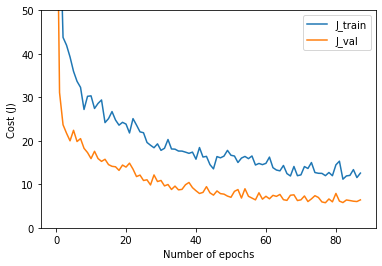

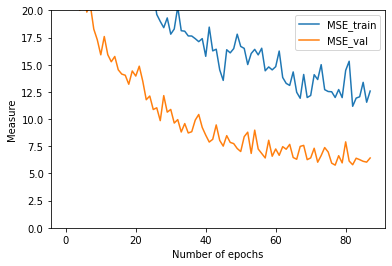

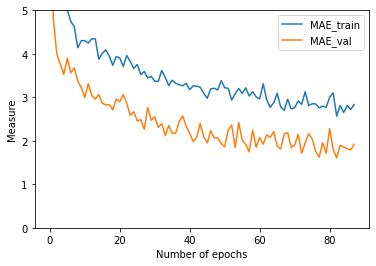

3/3 [==============================] - 0s 3ms/step - loss: 9.7372 - mean_squared_error: 9.7372 - mean_absolute_error: 2.3396
Final test loss (MSE):  9.73721981048584
Final test absolute error (MAE):  2.339604
First test:
Right label:  0.0 Predicted label:  6.609127
Second test:
Right label:  5.0 Predicted label:  6.5708523
Tester: Regression model learning OK


In [ ]:
# implement your solution BELOW

earlystopping_callback = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10 )

history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val),
              batch_size=24, epochs=400, verbose=1, callbacks=[earlystopping_callback])

tr_losses = history.history["loss"]
val_losses = history.history["val_loss"]

print("Final training loss: ", tr_losses[-1])
print("Final validation loss: ", val_losses[-1])

plt.plot(tr_losses, label="J_train")
plt.plot(val_losses, label="J_val")
plt.ylim((0,50))
plt.xlabel("Number of epochs")
plt.ylabel("Cost (J)")
plt.legend()
plt.show();

tr_mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']
tr_mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

plt.plot(tr_mse, label="MSE_train")
plt.plot(val_mse, label="MSE_val")
plt.ylim((0,20))
plt.xlabel("Number of epochs")
plt.ylabel("Measure")
plt.legend()
plt.show();

plt.plot(tr_mae, label="MAE_train")
plt.plot(val_mae, label="MAE_val")
plt.ylim((0,5))
plt.xlabel("Number of epochs")
plt.ylabel("Measure")
plt.legend()
plt.show();

test_mse= reg_model.evaluate(x_test,y_test)[0]
y_test_predicted = reg_model.predict(x_test).reshape(y_test.shape)
test_mae = np.mean(np.abs(y_test_predicted - y_test))

print("Final test loss (MSE): ", test_mse)
print("Final test absolute error (MAE): ", test_mae)

print("First test:")
print("Right label: ", y_test[3], "Predicted label: ", y_test_predicted[3])
print("Second test:")
print("Right label: ", y_test[48], "Predicted label: ", y_test_predicted[48])

# implement your solution ABOVE

tester.test('reg_model_learning', test_mse, test_mae)

## **F**: A regressziós adatbázis átalakítása klasszifikációs adatbázissá

Alakítsd át a regressziós adatbázist, hogy alkalmas legyen 
klasszifikációs feladathoz! A kategóriákat az alábbiak alapján alakítsd ki : 

*   **F/1**: 3 kategória. A kategóriákat úgy alakítsd ki, hogy a regressziós adatbázis címkéinek intervallumán felveszel két küszöbértéket. Az első kategóriába a kisebb küszöbérték alatti, a másodikba a két küszöbérték közti és a harmadikba a nagyobb küszöbérték feletti címkével rendelkező mintaelemek kerüljenek. 
Tehát, például ha a regressziós adatbázis címkéi 3 és 8 közt vannak, akkor a két küszöbértéknek választhatjuk az 5.2-t és a 6.1-et. Ekkor az 1. kategóriába az 5.2-nél kisebb címkéjű elemek, a 2. kategóriába az 5.2 és 6.1 közti címkéjű elemek és a 3. kategóriába a 6.1-nél nagyobb címkéjű elemek kerülnek. Azonos címkéjű elemek mindenképpen azonos kategóriába kell, hogy kerüljenek.

*   **F/2**: 4 kategória. A kategóriákat úgy alakítsd ki, hogy a regressziós adatbázis címkéinek intervallumán felveszel három küszöbértéket. Az első kategóriába a kisebb küszöbérték alatti, a másodikba az első és második küszöbérték közti, a harmadikba a második és a haramdik küszöbérték közti, és a negyedikbe a harmadik küszöbérték feletti címkével rendelkező mintaelemek kerüljenek. 
Tehát, például ha a regressziós adatbázis címkéi 3 és 8 közt vannak, akkor a három küszöbértéknek választhatjuk a 3.8-at, a 6.1-et és a 7.5-öt. Ekkor az 1. kategóriába az 3.8-nál kisebb címkéjű elemek, a 2. kategóriába az 3.8 és 6.1 közti címkéjű elemek, a 3. kategóriába az 6.1 és 7.5 közti címkéjű elemek és a 4. kategóriába a 7.5-nél nagyobb címkéjű elemek kerülnek. Azonos címkéjű elemek mindenképpen azonos kategóriába kell, hogy kerüljenek.


Válaszd ki a küszöbértékeket úgy, hogy a kategóriábákba **megközelítőleg** ugyanannyi elem kerüljön! Hozd létre az új kategóriacímkéket az `y_train`, `y_val`, `y_test` tömbökből. Kerüljenek ezek a `y_cat_train`, `y_cat_val`, `y_cat_test` változókba!



In [ ]:
# implement your solution BELOW
values, counts = np.unique(labels, return_counts=True)
tierce = int(np.sum(counts)/3)

csum = np.cumsum(counts)
f_bound = values[np.argmin(abs(csum-csum[-1]/3)) + 1]
s_bound = values[np.argmin(abs(csum-csum[-1]/3*2)) + 1]

y_cat_train = np.where(y_train<f_bound, 0, np.where(y_train>s_bound, 2, 1))
y_cat_val = np.where(y_val<f_bound, 0, np.where(y_val>s_bound, 2, 1))
y_cat_test = np.where(y_test<f_bound, 0, np.where(y_test>s_bound, 2, 1))
# implement your solution ABOVE
tester.test('cl_dataset', y_cat_train, y_cat_val, y_cat_test)

Tester: Classification dataset creation OK


## **G**: Kategóriacímkék átalakítása one-hot kódolásra

Kettőnél több kategóriás (multi-class) klasszifikációnál minden kategóriához egy valószínűséget becslünk, azaz a háló kimenete akkora méretű, ahány kategóriánk van. Így tehát az igazi címkéink ugyanekkora méretű one-hot kódolású vektorok lesznek, ezeket címkevektorokként használva fogjuk betanítani a hálót.

Készítsd el a one-hot kódolású címkevektor tömböket a kategóriacímkéket tartalmazó `y_cat_train`, `y_cat_val`, `y_cat_test` tömbökből! Az új tömbök kerüljenek a `y_onehot_train`, `y_onehot_val`, `y_onehot_test` változókba! A tömbök alakja így (n_samples, n_categories), típusuk legyen `np.float32`!


In [ ]:
# implement your solution BELOW
y_cat_train = np.array(y_cat_train, dtype=np.float32).reshape(-1,1)
y_cat_val = np.array(y_cat_val, dtype=np.float32).reshape(-1,1)
y_cat_test = np.array(y_cat_test, dtype=np.float32).reshape(-1,1)

a = np.zeros((len(y_cat_train)))
b = np.ones((len(y_cat_train)))
c = np.full((len(y_cat_train)),2)
y_onehot_train = np.stack([a,b,c], axis=1)
mask = y_onehot_train == y_cat_train
y_onehot_train = mask.astype(np.float32)

a = np.zeros((len(y_cat_val)))
b = np.ones((len(y_cat_val)))
c = np.full((len(y_cat_val)),2)
y_onehot_val = np.stack([a,b,c], axis=1)
mask = y_onehot_val == y_cat_val
y_onehot_val = mask.astype(np.float32)

y_onehot_test = np.stack([a,b,c], axis=1)
mask = y_onehot_test == y_cat_test
y_onehot_test = mask.astype(np.float32)

# implement your solution ABOVE

tester.test('cl_onehot', y_onehot_train, y_onehot_val, y_onehot_test)

Tester: One-hot conversion OK


## **H**: A klasszifikációs neuronháló definiálása Keras-ban 

Használd a `keras.models.Sequential()` osztályt a háló definiálásához! A háló architektúráját az alábbiak alapján alakítsd ki:
- **H/1**: Kétrétegű háló, az első réteg neuronjainak száma 50, aktivációs függvénye ReLU. Az első réteg után alkalmazz dropout-ot neurononként 30%-os valószínűséggel!
- **H/2**: Négyrétegű háló, a neuronok száma rendre 20, 20, 10, aktivációs függvényük ReLU. Az egyes rétegek közé tégy dropout rétegeket, melyek 20%-os valószínűséggel nulláznak ki egy-egy elemet!
- **H/3**: Háromrétegű háló, a neuronok száma rendre 50, 30. Aktivációs függvényként használj sorban tanh-t, majd ReLU-t!

Minden esetben csak teljesen összekötött (dense) rétegeket, valamint dropout rétegeket kell használnod. Az aktivációs függvényeket a telejesen összekötött rétegek `activation` paramétereként add meg (azaz most ne használj külön Acitvation rétegeket). A rétegek számába beleértendő a kimenetre képző, utolsó réteg is, melynek méretét a címke mérete határozza meg. Alkalmazd a tanult aktivációs függvényt az utolsó rétegen, függően a feladat típusától!
A modellt fordítsd le a `compile()` függvény segítségével: a költségfüggvény legyen a szokásos, multi-class klasszifikációhoz használatos (categorical) crossentropy, optimizer algoritmusként pedig alkalmazd az SGD algoritmust megfelelő tanulási rátával! 
A klasszifikációs neuronhálót tartalmazó keras.models.Sequential() típusú változót nevezd el `cl_model`-nek. 

In [ ]:
# implement your solution BELOW
cl_model = keras.models.Sequential()
cl_model.add(keras.layers.Dense(20, activation="relu", input_dim=x_train.shape[1]))
cl_model.add(keras.layers.Dropout(0.2))
cl_model.add(keras.layers.Dense(20, activation="relu"))
cl_model.add(keras.layers.Dropout(0.2))
cl_model.add(keras.layers.Dense(10, activation="relu"))
cl_model.add(keras.layers.Dropout(0.2))
cl_model.add(keras.layers.Dense(3, activation="softmax"))

cl_model.compile(optimizer=keras.optimizers.SGD(learning_rate = 0.1), loss="categorical_crossentropy", metrics=['accuracy'])

# implement your solution ABOVE

tester.test('cl_model_architecture', cl_model)

Tester: Classification model architecture OK


## **I**: A háló betanítása (multi-class) klasszifikációs feladatra

Tanítsd be a neuronhálót a tanítóhalmazon! Használj early stopping-ot a validációs halmazzal! A tanulási rátát, epoch-ok maximális számát, a batch méretet, az early stopping `patience` paraméterét szabadon átállíthatod. Próbálgathatsz különböző kombinációkat, hogy jobb eredményt érj el.

- Rajzold ki, hogyan alakult a tanulási és validációs költség a betanítás során! Ehhez használhatod a `matplotlib` könyvtárat, példát találsz a 8. előadás notebookjában. 
- A crossentropy költség mellett, a helyesen klasszifikált mintaelemek arányának (accuracy) tanító- és validációs halmazon történő alakulását is rajzold ki egy másik grafikonon! A grafikonok y tengelyének megjelenített értékhatárait úgy állítsd be, hogy mindegyik idősor látható legyen és könnyen ki lehessen venni a költségek alakulását a tanítás vége felé is!
- Számold ki a betanított modell crossentropy költségét és az accuracy-t a teszthalamzon, majd add értékül ezeket az értékeket a `test_ce` és `test_acc` változóknak!
- Számold ki az F1-score-t a teszthalmazon, majd add értékül ezt az értéket a `test_f1` változónak! Az F1-score a precision és recall értékek harmonikus közepe, azaz az alábbi módon számolható:

$$ F_1 = 2 \cdot \frac{\textrm{precision} \cdot \textrm{recall}}{\textrm{precision} + \textrm{recall}} $$

Az F1-score tökéletes klasszifikáció esetén 1, tökéletesen hibás klasszifikáció esetén pedig 0, hasonlóan az accuracy metrikához. Az F1-score előnye, hogy robusztus, nehéz "megtéveszteni", ha magas értéket ad, a modell nagy valószínűséggel tényleg jól működik.
Az F1-score definíciójában a precision és recall függvények azonosak az 1. házi feladat B) részében megvalósított multi-class feladatokat is kezelő függvényeivel. Természetesen az input formátumára figyelni kell (hogy valószínűségekként, vagy kategorikus címkékként adjuk be a becsléseket és igazi címkéket).

Epoch 1/400
4/4 [==============================] - 1s 78ms/step - loss: 1.1227 - accuracy: 0.3557 - val_loss: 1.0657 - val_accuracy: 0.4557
Epoch 2/400
4/4 [==============================] - 0s 16ms/step - loss: 1.0704 - accuracy: 0.4337 - val_loss: 1.0658 - val_accuracy: 0.4304
Epoch 3/400
4/4 [==============================] - 0s 17ms/step - loss: 1.0863 - accuracy: 0.4308 - val_loss: 1.0666 - val_accuracy: 0.4304
Epoch 4/400
4/4 [==============================] - 0s 17ms/step - loss: 1.0392 - accuracy: 0.4444 - val_loss: 1.0648 - val_accuracy: 0.4177
Epoch 5/400
4/4 [==============================] - 0s 17ms/step - loss: 1.0825 - accuracy: 0.4288 - val_loss: 1.0657 - val_accuracy: 0.4051
Epoch 6/400
4/4 [==============================] - 0s 17ms/step - loss: 1.0805 - accuracy: 0.4081 - val_loss: 1.0655 - val_accuracy: 0.3924
Epoch 7/400
4/4 [==============================] - 0s 18ms/step - loss: 1.0763 - accuracy: 0.4375 - val_loss: 1.0652 - val_accuracy: 0.4177
Epoch 8/400
4/4 [===

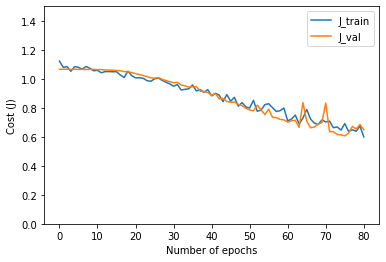

Final training loss:  0.5993022322654724
Final validation loss:  0.6498099565505981


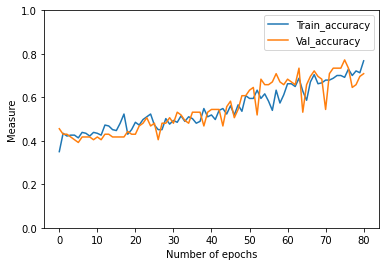

3/3 [==============================] - 0s 4ms/step - loss: 0.6452 - accuracy: 0.7342
Final test loss:  0.6452452540397644
Final test accuracy:  0.7341772317886353
Final test f1-socre:  0.7698145939499078
Tester: Classification model learning OK
Tester: All tests were successful.


In [ ]:
# implement your solution BELOW
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

earlystopping_callback = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5 )

history = cl_model.fit(x_train, y_onehot_train, validation_data=(x_val, y_onehot_val),
              batch_size=64, epochs=400, verbose=1, callbacks=[earlystopping_callback])

tr_losses = history.history["loss"]
val_losses = history.history["val_loss"]
tr_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(tr_losses, label="J_train")
plt.plot(val_losses, label="J_val")
plt.ylim((0,1.5))
plt.xlabel("Number of epochs")
plt.ylabel("Cost (J)")
plt.legend()
plt.show();

print("Final training loss: ", tr_losses[-1])
print("Final validation loss: ", val_losses[-1])

plt.plot(tr_acc, label="Train_accuracy")
plt.plot(val_acc, label="Val_accuracy")
plt.ylim((0,1))
plt.xlabel("Number of epochs")
plt.ylabel("Measure")
plt.legend()
plt.show();

test_ce, test_acc = cl_model.evaluate(x_test,y_onehot_test)
print("Final test loss: ", test_ce)
print("Final test accuracy: ", test_acc)

y_onehot_test_predicted = cl_model.predict(x_test)

test_pre = precision_score(np.argmax(y_onehot_test, axis=1),np.argmax(y_onehot_test_predicted, axis=1), average='macro')
test_rec = recall_score(np.argmax(y_onehot_test, axis=1),np.argmax(y_onehot_test_predicted, axis=1), average='macro')

test_f1 = 2*test_pre*test_rec/(test_pre+test_rec)
print("Final test f1-socre: ", test_f1)
# implement your solution ABOVE

tester.test('cl_model_learning', test_ce, test_acc, test_f1)
tester.print_all_tests_successful()